In [1]:
import pandas as pd

data = pd.read_csv("data/adult.csv", index_col=0)

In [2]:
feature_names = list(data)

In [3]:
# Split the feature and target
income_cat = data['income']
features = data.drop(columns=['income'])
features_onehot = pd.get_dummies(features)
features.dtypes == object

age               False
workclass          True
education          True
education-num     False
marital-status     True
occupation         True
relationship       True
race               True
gender             True
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
dtype: bool

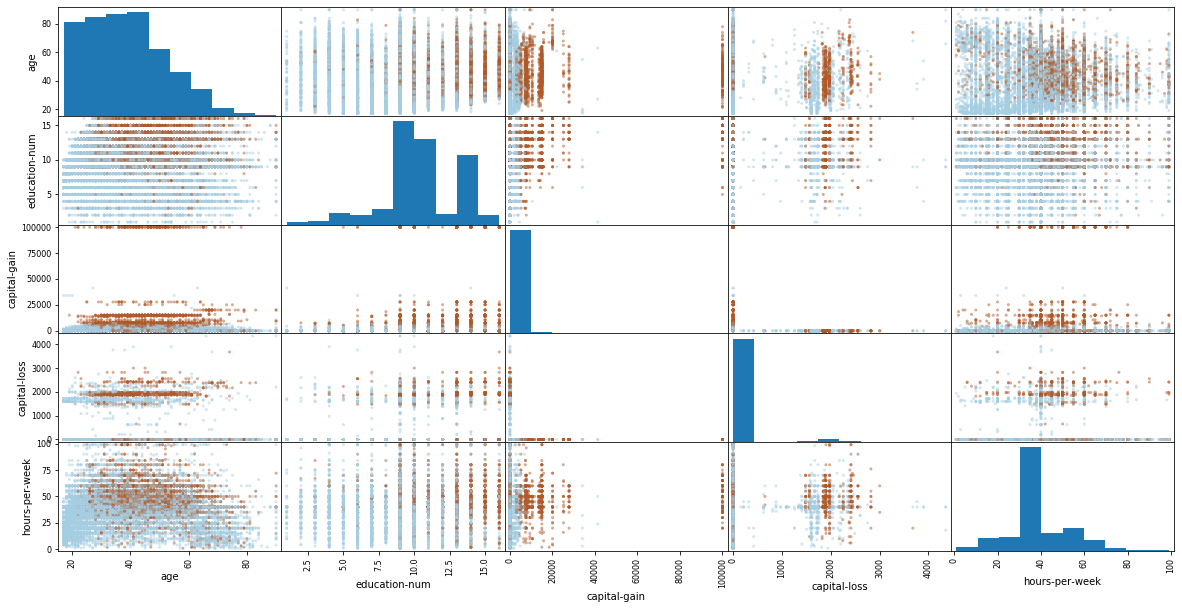

In [5]:
fig = pd.plotting.scatter_matrix(data, c=income_cat==' >50K', cmap='Paired', figsize=(20,10))

In [53]:
# Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_onehot, income_cat, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
from sklearn.linear_model import LogisticRegression as lrm
lr = lrm()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

C:\Users\57luu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8495270851246776

In [63]:
from sklearn.ensemble import RandomForestClassifier as rfcm
rfc = rfcm(n_estimators=100)
rfc.fit(X_train_scaled, y_train)
rfc.score(X_test_scaled, y_test)

0.8465790443434468

In [67]:
from sklearn.neighbors import KNeighborsClassifier as knnc
knn = knnc(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)


0.8291364697211645

In [66]:
from sklearn import svm
svm = svm.SVC(gamma='auto')
svm.fit(X_train_scaled, y_train)
svm.score(X_test_scaled, y_test)



0.848421569831716

In [82]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {'C': 10. ** np.arange(-5, 1, 2),
              'gamma' : 10. ** np.arange(-6, -2, 2)}
grid_search = GridSearchCV(svm.SVC(), param_grid = param_grid, cv=5, verbose=3, return_train_score=True, n_jobs=4)
grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 11.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid={'C': array([1.e-05, 1.e-03, 1.e-01]),
                         'gamma': array([1.e-06, 1.e-04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=3)

In [83]:
scores = grid_search.cv_results_['mean_test_score']
print(scores)

[0.76007371 0.76007371 0.76007371 0.76007371 0.76007371 0.76068796]


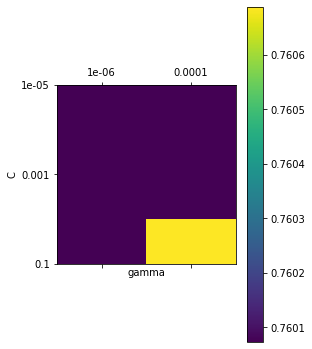

In [84]:
from matplotlib import pyplot as plt
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(3, 2)

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(2), param_grid['gamma'])
plt.yticks(np.arange(3), param_grid['C']);

In [94]:
from sklearn.linear_model import Ridge, Lasso
import sklearn
data, target = sklearn.datasets.load_diabetes(return_X_y=True)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

ridge_model = Ridge()
ridge_model = ridge_model.fit(X_train_scaled, y_train)
lasso_model = Lasso()
lasso_model = lasso_model.fit(X_train_scaled, y_train)


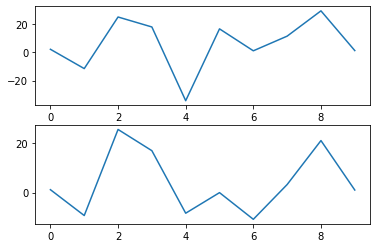

In [107]:
fig = plt.figure()
axis1 = fig.add_subplot(211)
axis1.plot(ridge_model.coef_)
axis2 = fig.add_subplot(212)
axis2.plot(lasso_model.coef_)

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

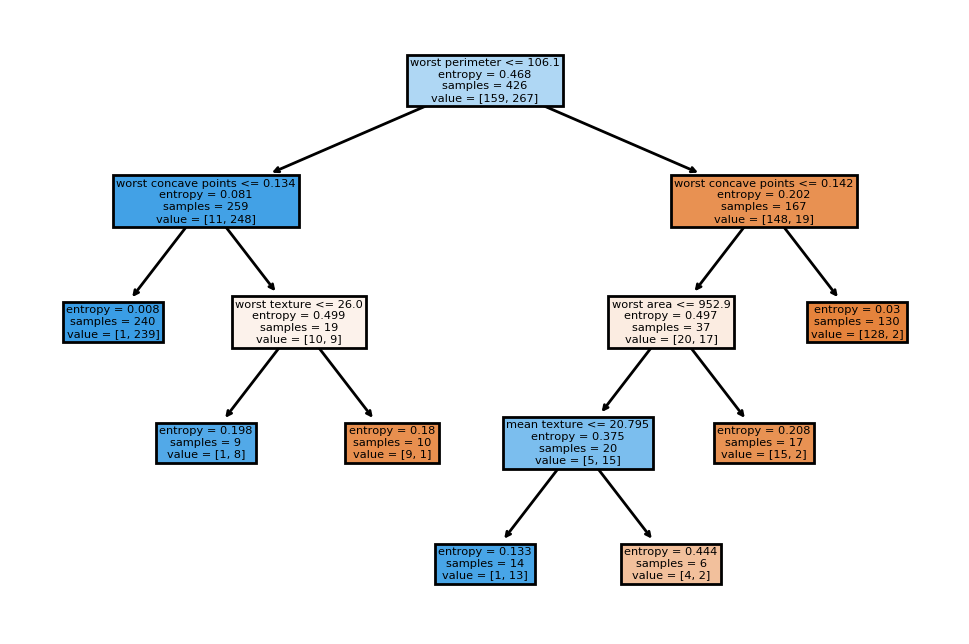

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=7, min_samples_split=5, min_impurity_decrease=.005)
tree.fit(X_train, y_train)
plt.figure(dpi=200)
tree_plot = plot_tree(tree, feature_names=cancer.feature_names, filled=True)


In [156]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(5, 11), 'max_leaf_nodes': range(8, 13)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(5, 11),
                         'max_leaf_nodes': range(8, 13)},
             pre_dispatch='2

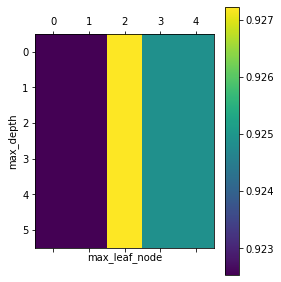

In [157]:
from matplotlib import pyplot as plt
scores = grid.cv_results_['mean_test_score']
scores = np.array(scores).reshape(5, 6)

plt.matshow(scores)
plt.xlabel('max_depth')
plt.ylabel('max_leaf_node')
plt.colorbar()


In [200]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [20, 50, 100, 150]
max_depth = [5, 10, 15]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

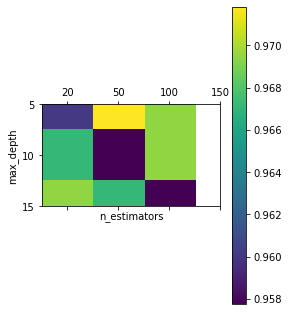

In [201]:
from matplotlib import pyplot as plt
scores = grid.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(max_depth), len(n_estimators))

plt.matshow(scores)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.yticks(np.arange(len(max_depth)), param_grid['max_depth'])
plt.xticks(np.arange(len(n_estimators)), param_grid['n_estimators'])
plt.show()

In [197]:
scores

array([[0.9600939 , 0.97183099, 0.96948357],
       [0.95774648, 0.96948357, 0.96948357],
       [0.95774648, 0.96948357, 0.96948357]])